In [1]:
using Pkg

In [3]:
Pkg.add("TimeseriesPrediction")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed DelayEmbeddings ────── v1.1.0
 Installed TimeseriesPrediction ─ v0.6.0
 Installed SimpleDiffEq ───────── v0.4.0
 Installed DynamicalSystemsBase ─ v1.3.0
 Installed Arpack ─────────────── v0.3.1
 Installed MultivariateStats ──── v0.6.0
 Installed NearestNeighbors ───── v0.4.3
  Updating `~/.julia/environments/v1.1/Project.toml`
  [f218859d] + TimeseriesPrediction v0.6.0
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [7d9fca2a] + Arpack v0.3.1
  [5732040d] + DelayEmbeddings v1.1.0
  [6e36e845] + DynamicalSystemsBase v1.3.0
  [6f286f6a] + MultivariateStats v0.6.0
  [b8a86587] + NearestNeighbors v0.4.3
  [05bca326] + SimpleDiffEq v0.4.0
  [f218859d] + TimeseriesPrediction v0.6.0
  Building Arpack → `~/.julia/packages/Arpack/cu5By/deps/build.log`


In [4]:
Pkg.add("DynamicalSystemsBase")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [6e36e845] + DynamicalSystemsBase v1.3.0
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [6]:
Pkg.add("PyPlot")

 Resolving package versions...
 Installed LaTeXStrings ─ v1.0.3
 Installed PyPlot ─────── v2.8.1
  Updating `~/.julia/environments/v1.1/Project.toml`
  [d330b81b] + PyPlot v2.8.1
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.0.3
  [d330b81b] + PyPlot v2.8.1


┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186


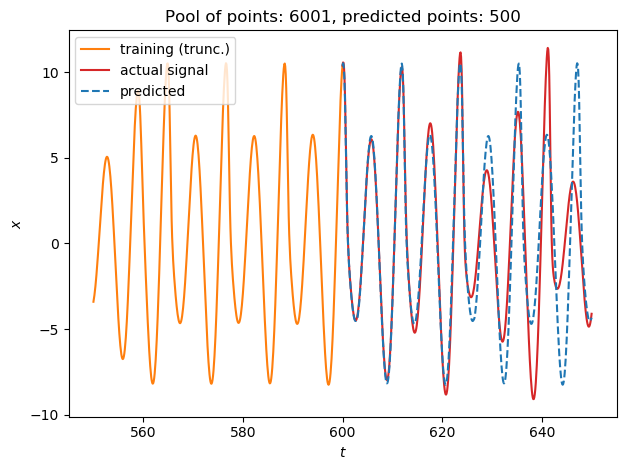

In [7]:
using TimeseriesPrediction # re-exports DelayEmbeddings
using DynamicalSystemsBase # to access some systems

ds = Systems.roessler(0.1ones(3))
dt = 0.1
data = trajectory(ds, 1000; dt=dt)
N_train = 6001
s_train = data[1:N_train, 1]
s_test  = data[N_train:end,1]

ntype = FixedMassNeighborhood(3)

p = 500
s_pred = localmodel_tsp(s_train, 4, 15, p; ntype=ntype)

using PyPlot
figure()
plot(550:dt:600, s_train[5501:end], label = "training (trunc.)", color = "C1")
plot(600:dt:(600+p*dt), s_test[1:p+1], color = "C3", label = "actual signal")
plot(600:dt:(600+p*dt), s_pred, color = "C0", ls="--", label="predicted")

title("Pool of points: $(N_train), predicted points: $(p)")
xlabel("\$t\$"); ylabel("\$x\$")
legend(loc="upper left")
tight_layout()